In [41]:
import pandas as pd
from sklearn import preprocessing
import pickle
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [37]:
df= pd.read_csv("train.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [38]:
df2 = pd.read_csv("test.csv")
df2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [58]:
def prepro(data_path):

    df= pd.read_csv(data_path)
    df.drop_duplicates()
    df.dropna(inplace=True)
    df.drop(columns= ["id",'Unnamed: 0'],inplace=True)

    #label_encoding

    # Create a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit and transform the categorical columns in the `df` dataframe
    cat_col = df.select_dtypes(include="object").columns
    for i in cat_col:
        df[i] = label_encoder.fit_transform(df[i])

    # Save the label encoder using pickle
    with open('label_encoder.pkl', 'wb') as f:
        pickle.dump(label_encoder, f)

    features = df.drop("satisfaction",axis=1)
    target = df["satisfaction"]

    features["Inflight Service"]= (features["Inflight service"]+features["On-board service"]+features["Leg room service"])/3
    features.drop(columns=["Inflight service","On-board service","Leg room service"],inplace=True)

    features.drop("Inflight entertainment", axis=1, inplace=True)

    scaler=StandardScaler()
    scaled_features=scaler.fit_transform(features)

    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    pca = PCA()
    principalComponents = pca.fit_transform(scaled_features)

    with open('pca.pkl', 'wb') as f:
        pickle.dump(pca, f)

    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Variance (%)') #for each component
    plt.title('Explained Variance')
    # plt.show()

    plt.savefig('explained_variance.png', dpi=300, bbox_inches='tight') #saving this image

    # Find elbow point
    var_cumsum = np.cumsum(pca.explained_variance_ratio_)
    elbow_index = np.argmin(np.abs(var_cumsum - 0.9))  # choosing threshold 0.9


    # Select number of components based on the elbow point
    n_components = elbow_index + 1  # add 1 to get the number of components
    print("Number of components selected:", n_components)

    
    pca = PCA(n_components= n_components)
    new_features = pca.fit_transform(scaled_features)
    
    return new_features, target


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(data):
    #num_cols = data.select_dtypes(include=['float', 'int']).columns.tolist()

    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    
    # Print the VIF dataframe
    print(vif.sort_values(by="VIF",ascending=False))

In [ ]:
features = df.drop("satisfaction",axis=1)
target = df["satisfaction"]

In [15]:
vif(features)

                              Feature        VIF
13             Inflight entertainment  27.599610
18                   Inflight service  21.223692
19                        Cleanliness  20.725966
16                   Baggage handling  19.377919
12                       Seat comfort  18.369767
21           Arrival Delay in Minutes  17.016449
20         Departure Delay in Minutes  16.956103
10                     Food and drink  14.117085
14                   On-board service  13.847464
11                    Online boarding  13.220601
8              Ease of Online booking  13.173583
6               Inflight wifi service  12.762207
15                   Leg room service   9.504498
17                    Checkin service   9.416240
9                       Gate location   9.008408
7   Departure/Arrival time convenient   8.381117
2                                 Age   7.573550
5                     Flight Distance   3.040530
4                               Class   2.817557
3                   

In [18]:
vif(features)

                              Feature        VIF
18                   Inflight Service  22.597608
13                   Baggage handling  17.741846
12                       Seat comfort  17.478529
15                        Cleanliness  17.277791
17           Arrival Delay in Minutes  17.011762
16         Departure Delay in Minutes  16.956009
8              Ease of Online booking  13.081460
11                    Online boarding  12.967183
10                     Food and drink  12.592307
6               Inflight wifi service  12.483949
9                       Gate location   8.978311
14                    Checkin service   8.958327
7   Departure/Arrival time convenient   8.278660
2                                 Age   7.542354
5                     Flight Distance   3.029778
4                               Class   2.809349
3                      Type of Travel   2.539956
0                              Gender   1.950597
1                       Customer Type   1.610275


In [68]:
train_path = "train.csv"

Number of components selected: 12


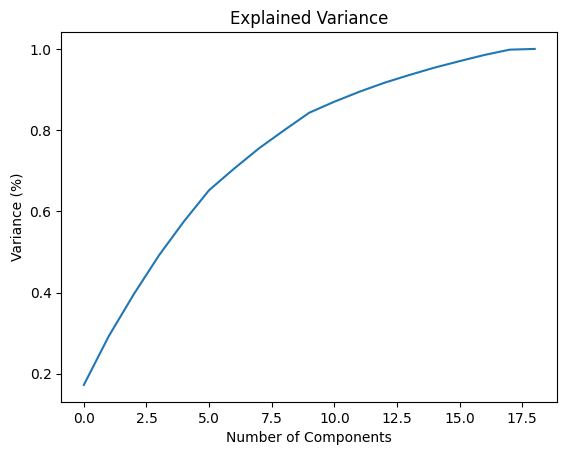

In [69]:
X,y= prepro(train_path)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

print(classification_report(y_test,y_pred))

with open(f"rfc.model.pickle", "wb") as f:
    pickle.dump(rfc,f)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     19332
           1       0.94      0.88      0.91     14855

    accuracy                           0.92     34187
   macro avg       0.92      0.92      0.92     34187
weighted avg       0.92      0.92      0.92     34187



In [78]:
df2= pd.read_csv("test.csv")
df2.drop_duplicates()
df2.dropna(inplace=True)
df2.drop(columns= ["id",'Unnamed: 0'],inplace=True)

#label_encoding
with open('label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)

cat_col = df.select_dtypes(include="object").columns
for i in cat_col:
    df2[i] = le.transform(df2[i])


features2 = df.drop("satisfaction",axis=1)
target2 = df["satisfaction"]

features2["Inflight Service"]= (features2["Inflight service"]+features2["On-board service"]+features2["Leg room service"])/3
features2.drop(columns=["Inflight service","On-board service","Leg room service"],inplace=True)

features2.drop("Inflight entertainment", axis=1, inplace=True)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

scaled_features2=scaler.transform(features2)


with open('pca.pkl', 'rb') as f:
    pca = pickle.load(f)
pca = PCA()
principalComponents2 = pca.fit_transform(scaled_features2)

var_cumsum = np.cumsum(pca.explained_variance_ratio_)
elbow_index = np.argmin(np.abs(var_cumsum - 0.9))  # choosing threshold 0.9


# Select number of components based on the elbow point
n_components = elbow_index + 1  # add 1 to get the number of components
#print("Number of components selected:", n_components)

pca = PCA(n_components= n_components)
new_features2 = pca.fit_transform(scaled_features2)

In [79]:
with open('rfc.model.pickle', 'rb') as f:
    model = pickle.load(f)

y_pred2= model.predict(new_features2)

print(classification_report(target2,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     58697
           1       0.98      0.96      0.97     44897

    accuracy                           0.97    103594
   macro avg       0.97      0.97      0.97    103594
weighted avg       0.97      0.97      0.97    103594

